In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [5]:
data = pd.read_csv('Mall_Customers.csv', index_col=0)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
data.drop(['Genre'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [8]:
data = data.sample(frac=1)

data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
78,54,48
147,77,36
22,24,73
112,63,54
154,78,76


In [9]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(n_clusters=2)

In [10]:
k_means.labels_

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0], dtype=int32)

In [11]:
np.unique(k_means.labels_)

array([0, 1], dtype=int32)

In [12]:
centers = k_means.cluster_centers_

centers

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

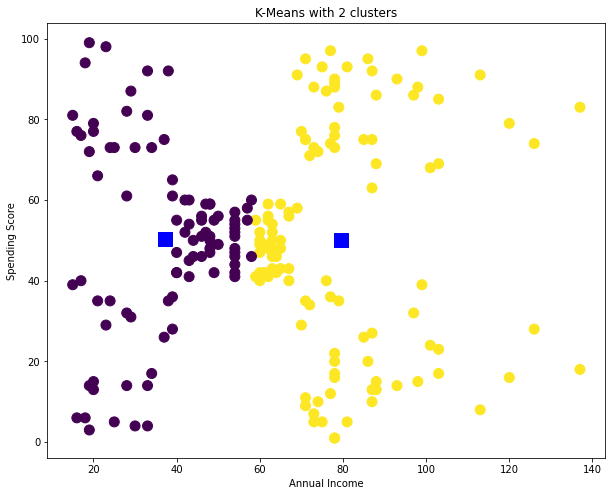

In [13]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data, k_means.labels_)

print("Score = ", score)

Score =  0.29689691625030085


Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

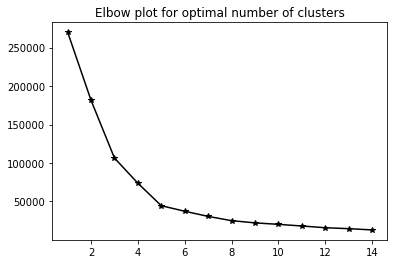

In [15]:
wscc = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

In [16]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(n_clusters=5)

In [17]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [18]:
centers = k_means.cluster_centers_

centers

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

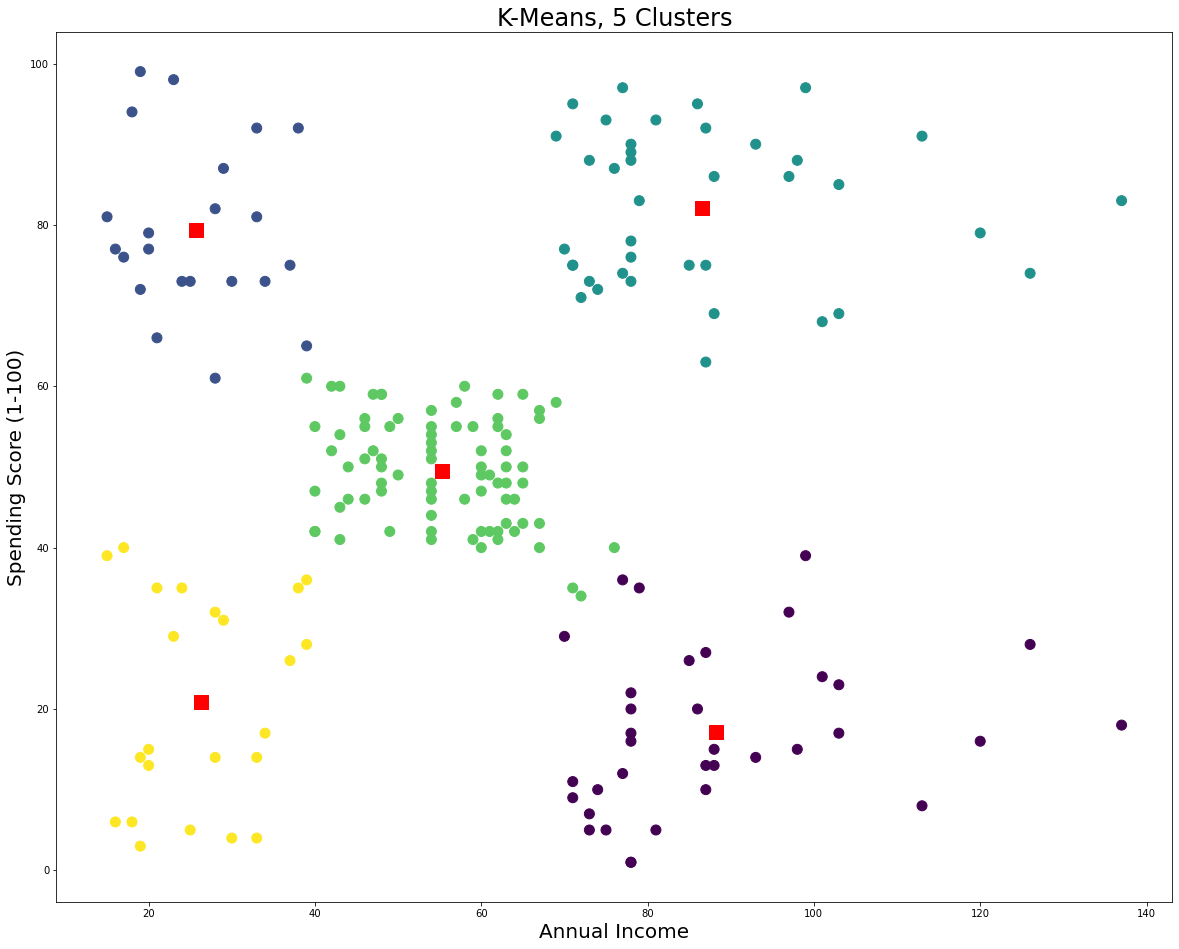

In [29]:
plt.figure(figsize=(20, 16))

plt.scatter(data["Annual Income (k$)"], 
            data["Spending Score (1-100)"], 
            c = k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color="red", marker = 's', s = 200) 

plt.xlabel("Annual Income", fontsize=20)
plt.ylabel("Spending Score (1-100)", fontsize=20)
plt.title("K-Means, 5 Clusters", fontsize=24)

plt.show()

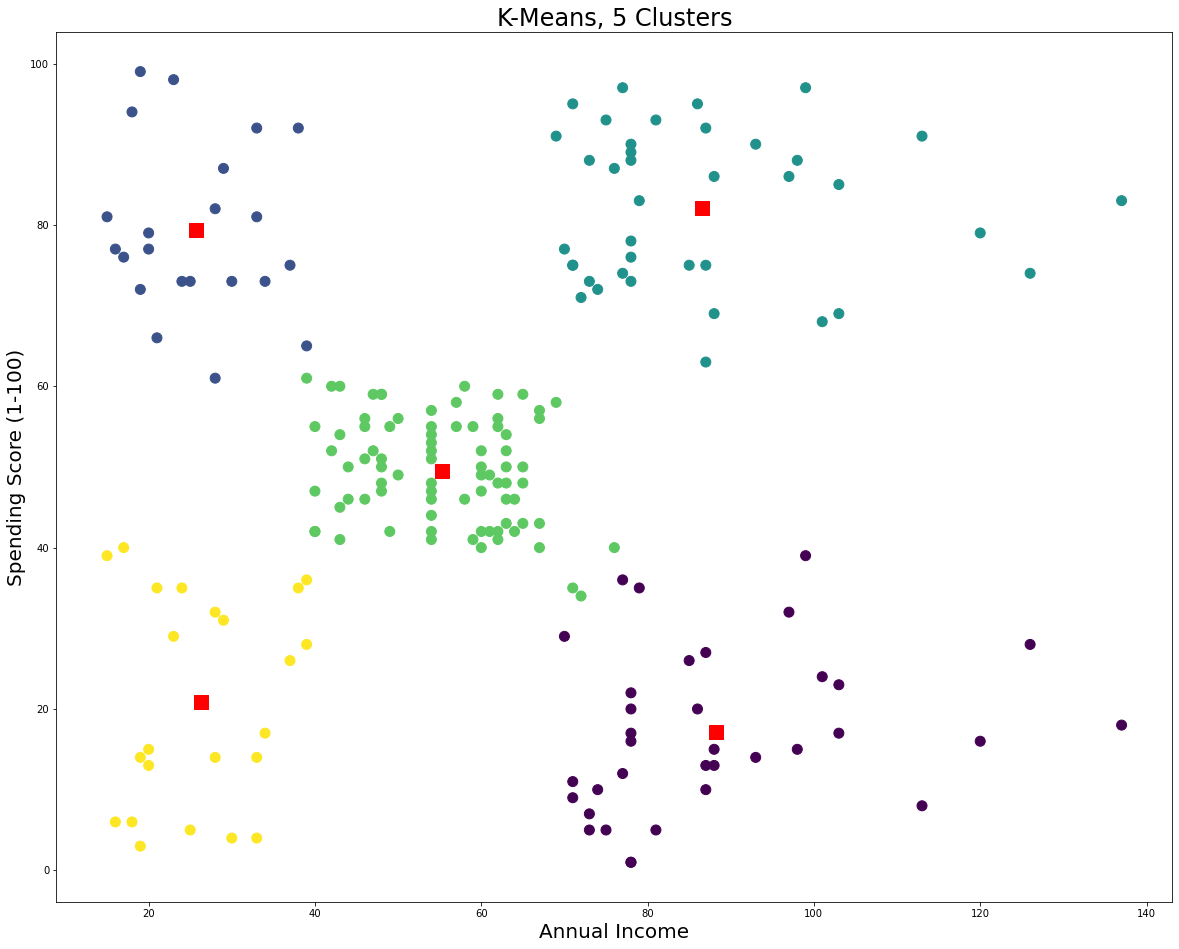

In [30]:
plt.figure(figsize=(20, 16))

plt.scatter(data["Annual Income (k$)"], 
            data["Spending Score (1-100)"], 
            c = k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color="red", marker = 's', s = 200) 

plt.xlabel("Annual Income", fontsize=20)
plt.ylabel("Spending Score (1-100)", fontsize=20)
plt.title("K-Means, 5 Clusters", fontsize=24)

plt.show()